# Clasificador de aplicaciones de Google play store apps

# Integrantes:

*   Joan Sebastian Patiño Jaimes-2202052
*   Jorge Eduardo Suarez Cortes-2205561
*   Cristian Stivens Villareal Parra-2204132

El conjunto de datos de Google Play Store Apps es un conjunto de datos web raspado que contiene información sobre 10,841 aplicaciones disponibles en la tienda de aplicaciones de Google Play.

El objetivo del proyecto es diseñar un modelo de clasificacion que nos permita hallar la aplicacion mas popular en el conjunto de datos segun diferentes variables como, su categoria, genero, tipo, instalaciones, etc. Una vez entrenado, el clasificador podrá identificar la mejor aplicación en función de los criterios seleccionados.

## Variables

- App: El nombre de la aplicación.
- Category: La categoría a la que pertenece la aplicación.
-  Rating: La calificación promedio de la aplicación.
- Installs: El número de instalaciones de la aplicación.
- tipo: El tipo de aplicación (gratuita o de pago).
- Price: El precio de la aplicación.
- Content_Rating: La clasificación de contenido de la aplicación.
- Genres: Los géneros a los que pertenece la aplicación.
- Last_Updated: La fecha en que se actualizó por última vez la aplicación.
- Current_Ver: La versión actual de la aplicación.
- Android_Ver: La versión mínima de Android requerida para ejecutar la aplicación.



In [ ]:
# @title **Librerias**
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
sns.set_theme()
pd.__version__

Mounted at /content/drive


'1.5.3'

<Axes: >

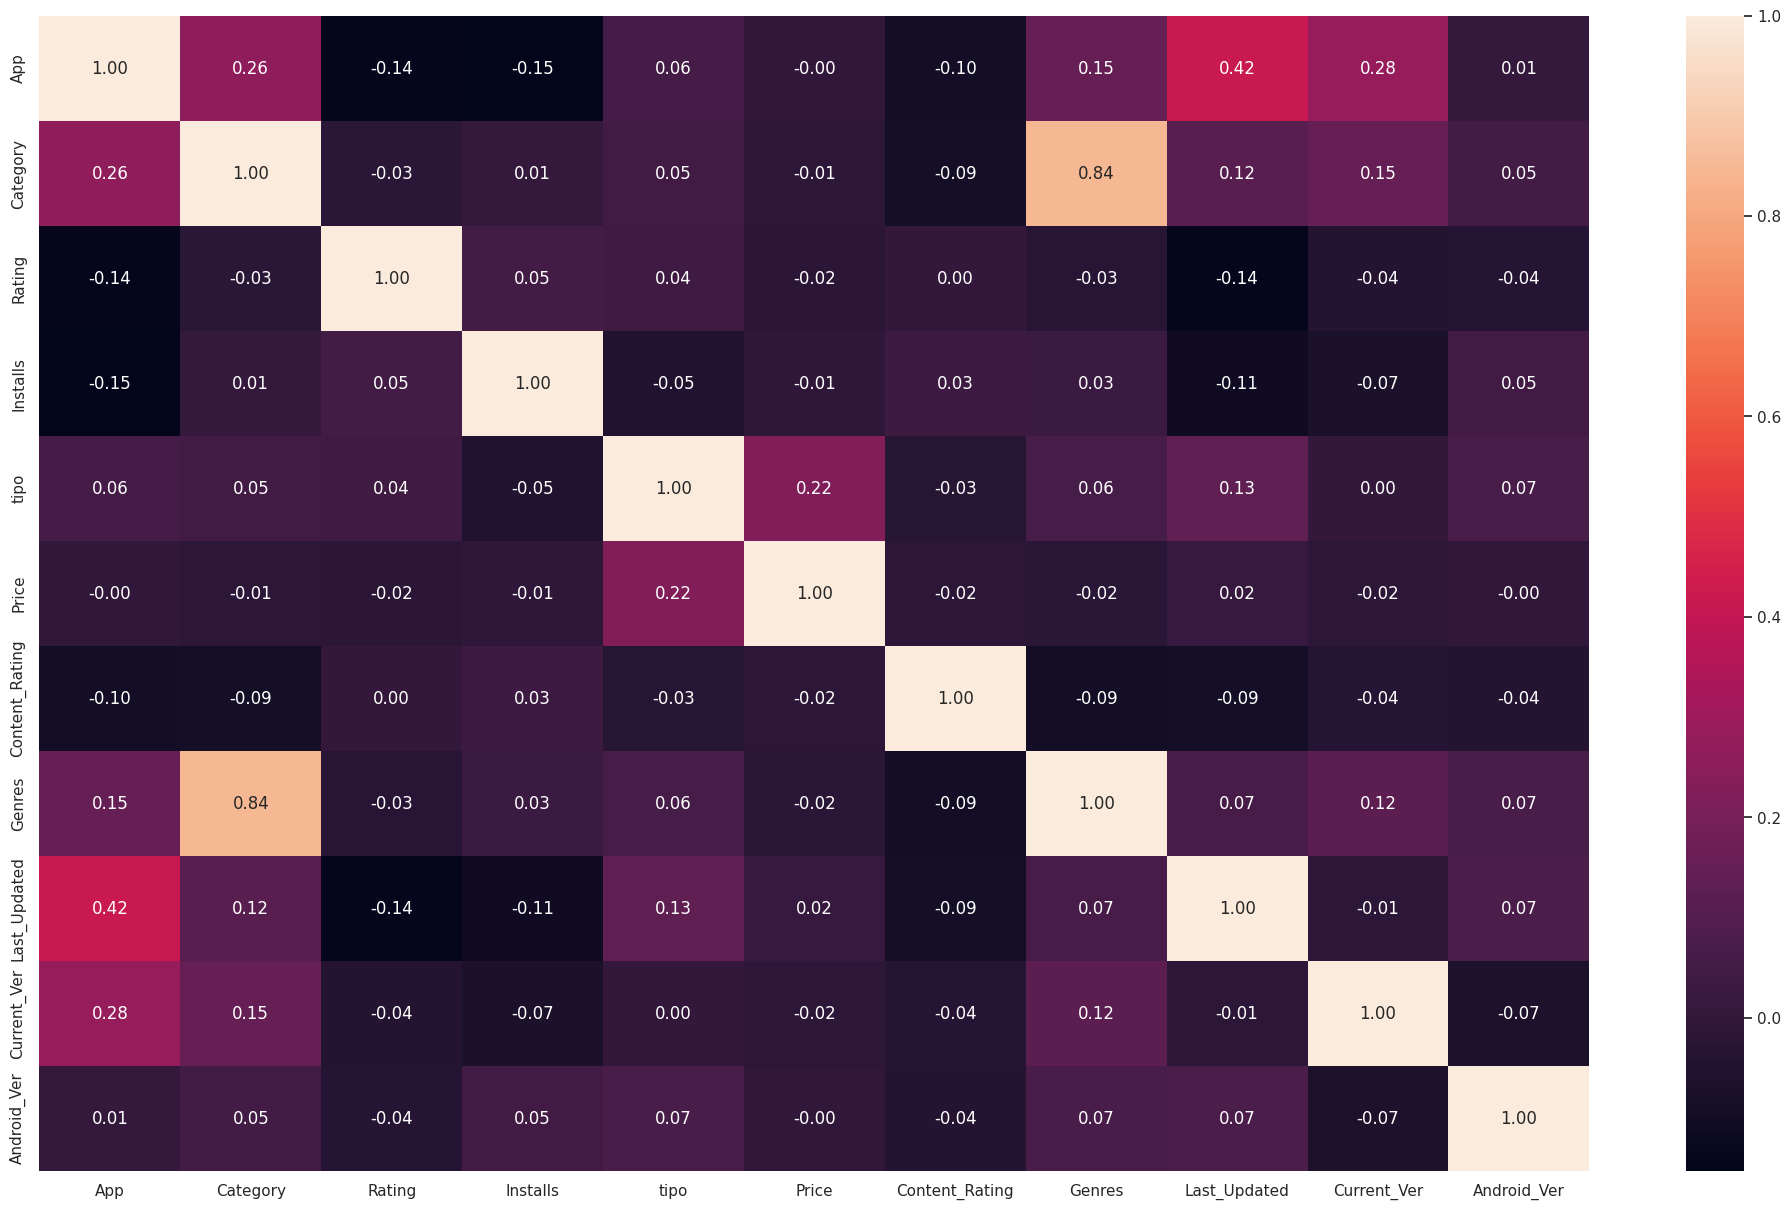

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ia Proyecto/datos_modificadosplay_store.csv')
data = pd.DataFrame(data)
data = data.dropna()
corr = data.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corr, annot=True, fmt=".2f")

In [ ]:
# @title Areglar nombre de las variables
data = pd.read_csv('/content/drive/MyDrive/ia Proyecto/googleplaystore.csv')
data = pd.DataFrame(data)
data.rename(columns={'Content Rating':'Content_Rating'},inplace=True)
data.rename(columns={'Android Ver':'Android_Ver'},inplace=True)
data.rename(columns={'Last Updated':'Last_Updated'},inplace=True)
data.rename(columns={'Type':'tipo'},inplace=True)

k=0
for i in data.Category.unique():
  data.Category.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Content_Rating.unique():
  data.Content_Rating.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.tipo.unique():
  data.tipo.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Genres.unique():
  data.Genres.replace(i, k, inplace = True)
  k = k+1
k=0
for i in data.Android_Ver.unique():
  data.Android_Ver.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.App.unique():
  data.App.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Last_Updated.unique():
  data.Last_Updated.replace(i, k, inplace = True)
  k = k+1
data.rename(columns={'Current Ver':'Current_Ver'},inplace=True)
k=0
for i in data.Current_Ver.unique():
  data.Current_Ver.replace(i, k, inplace = True)
  k = k+1
# Eliminar la columna 'Size' de 'data'
data = data.drop(columns=['Size'])
data = data.drop(columns=['Reviews'])

# Eliminar el símbolo de dólar y otros caracteres no numéricos
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = data['Price'].str.replace('Everyone', '0')  # Reemplaza 'Everyone' con '0' u otro valor apropiado

# Convertir la columna 'Price' a tipo float
data['Price'] = data['Price'].astype(float)


data['Installs'] = data['Installs'].str.rstrip('+')

data['Installs'] = data['Installs'].str.replace(',', '')

data = data[data['Installs'] != 'Free']
# Convertir la columna 'Installs' a tipo float
data['Installs'] = data['Installs'].astype(float)

# Imputar valores nulos con la media
data_imputada = data.fillna(data.mean())

data_imputada = data_imputada.drop(columns=['Android_Ver'])
data_imputada = data_imputada.drop(columns=['Current_Ver'])
data_imputada = data_imputada.drop(columns=['Last_Updated'])

# Asignar las variables "X" y "y"
y = data_imputada["Rating"].values
X = data_imputada.drop("Rating", axis = 1).values
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

<ipython-input-5-fb3d39ed67dd>:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')
<ipython-input-5-fb3d39ed67dd>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].astype(float)


In [ ]:
data.head()

,App,Category,Rating,Installs,tipo,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,0,0,4.1,10000.0,0,0.0,0.0,0,0,0,0
1,1,0,3.9,500000.0,0,0.0,0.0,1,1,1,0
2,2,0,4.7,5000000.0,0,0.0,0.0,0,2,2,0
3,3,0,4.5,50000000.0,0,0.0,1.0,0,3,3,1
4,4,0,4.3,100000.0,0,0.0,0.0,2,4,4,2


In [ ]:
# @title **Decision Tree Classifier**
def show_curve1():
  y = data["Rating"].values
  X = data.drop("Rating", axis = 1).values
  le = preprocessing.LabelEncoder()
  y = le.fit_transform(y)


  np.random.seed(10)
  means, stds = [], []
  tpr_values, tnr_values = [], []  # Listas para almacenar los valores de TPR y TNR

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2, 30)
  for nfolds in nfolds_range:
    est = DecisionTreeClassifier(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(n_splits=10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))

    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

# Mostrar la curva y obtener el accuracy, TPR y TNR
show_curve1()

Mejor valor de max_depth: 29
Mejor Accuracy: 0.3101476014760148
Menor Desviación Estándar: 0.014019712355360049


In [ ]:
#@title  **Random Forest Classifier**
def show_RandomForestClassifier():
  np.random.seed(10)
  means, stds = [], []

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2,20)
  for nfolds in nfolds_range:
    est=RandomForestClassifier(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

show_RandomForestClassifier()

Mejor valor de max_depth: 19
Mejor Accuracy: 0.3187269372693727
Menor Desviación Estándar: 0.008557485168916468


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ia Proyecto/datos_modificadosplay_store.csv')
data = pd.DataFrame(data)
data = data.dropna()

In [ ]:
# @title **Red neuronal**
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

y=data['Rating']
X=data.drop(columns=['Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=10)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_ohe, epochs=20, batch_size=10)

test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

probs = model.predict(X_test.to_numpy())
preds = np.argmax(probs, axis=1)

Epoch 1/20
656/656 [==============================] - 9s 13ms/step - loss: 590198.5625 - accuracy: 0.6595
Epoch 2/20
656/656 [==============================] - 8s 12ms/step - loss: 104088.1250 - accuracy: 0.6507
Epoch 3/20
656/656 [==============================] - 9s 13ms/step - loss: 184855.0781 - accuracy: 0.6245
Epoch 4/20
656/656 [==============================] - 8s 12ms/step - loss: 67042.1328 - accuracy: 0.6885
Epoch 5/20
656/656 [==============================] - 9s 14ms/step - loss: 17683.6348 - accuracy: 0.7094
Epoch 6/20
656/656 [==============================] - 10s 15ms/step - loss: 1774.2946 - accuracy: 0.7131
Epoch 7/20
656/656 [==============================] - 8s 12ms/step - loss: 219.5971 - accuracy: 0.7335
Epoch 8/20
656/656 [==============================] - 9s 14ms/step - loss: 0.7498 - accuracy: 0.7549
Epoch 9/20
656/656 [==============================] - 8s 12ms/step - loss: 0.7494 - accuracy: 0.7549
Epoch 10/20
656/656 [==============================] - 9s 14ms

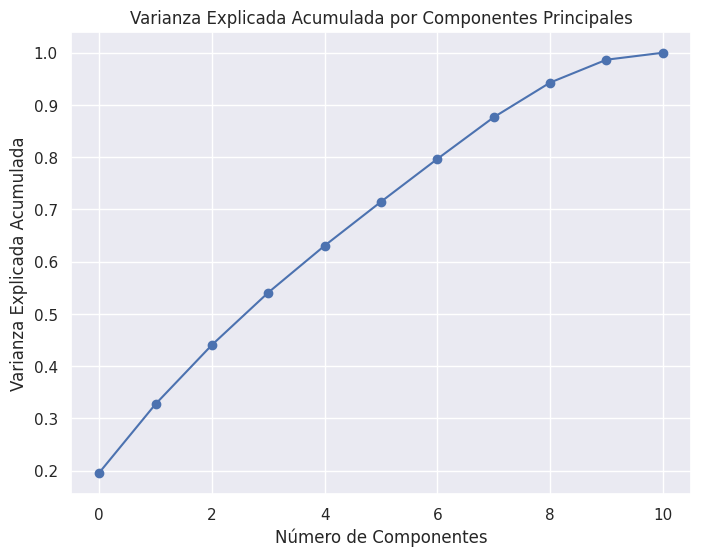

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Suponiendo que 'data' es tu DataFrame con las características
# Asegurar que las características están normalizadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Obtener la varianza explicada de cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()


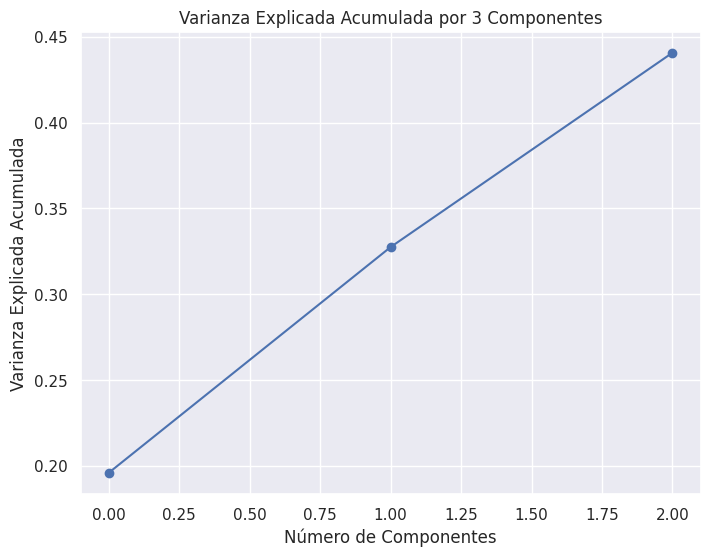

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Aplicar PCA con 3 componentes
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Obtener la varianza explicada de cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por 3 Componentes')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(5, 2)
(6556,)


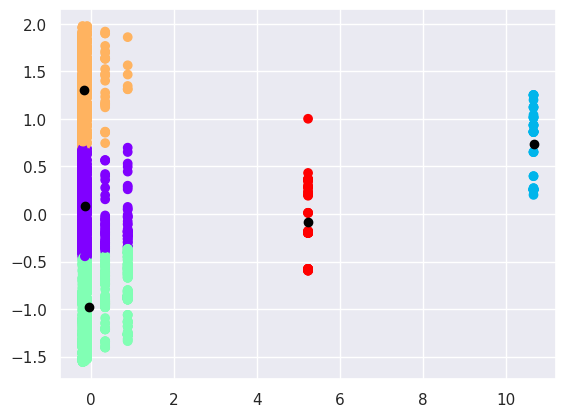

In [ ]:
# @title **Kmeans**
train, test = train_test_split(data, test_size=0.3, random_state=42)
Components = 2
pca_breast = PCA(n_components= Components, whiten=True)
pca_breast.fit(train)
X_pca_train = pca_breast.transform(train)
X_pca_test = pca_breast.transform(test)

# Crea y ajusta el modelo KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca_train)

# Obtiene las etiquetas asignadas por KMeans
labels_train = kmeans.predict(X_pca_train)

# Visualiza los resultados
plt.scatter(X_pca_train[:,0],X_pca_train[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print(kmeans.cluster_centers_.shape)
print(kmeans.labels_.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'The Elbow Method -inertia k')

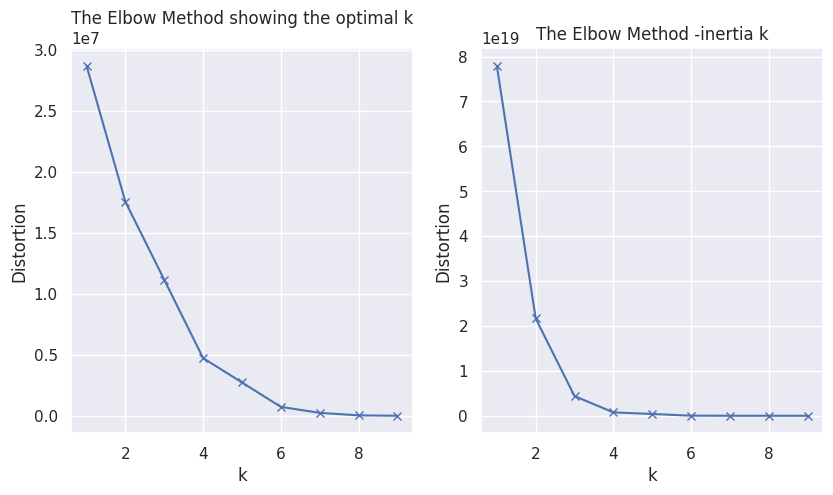

In [ ]:
# @title **Grafica del metodo del codo**
K_value = 2

y=data['Rating']
X=data.drop(columns=['Rating'])
kmeans = KMeans(n_clusters=K_value)
kmeans.fit(X)

distortions = []
wss = [] #Within-Cluster-Sum of Squared
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    wss.append(kmeanModel.inertia_)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(K, distortions, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.subplot(132)
plt.plot(K, wss, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method -inertia k')

In [ ]:
# @title **Comparativa**
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn import preprocessing
import numpy as np


# Decision Tree Classifier
def show_curve1():
  y = data["Rating"].values
  X = data.drop("Rating", axis = 1).values
  le = preprocessing.LabelEncoder()
  y = le.fit_transform(y)


  np.random.seed(10)
  means, stds = [], []
  tpr_values, tnr_values = [], []  # Listas para almacenar los valores de TPR y TNR

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2, 30)
  for nfolds in nfolds_range:
    est = DecisionTreeClassifier(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(n_splits=10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))

    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]
  result_df = pd.DataFrame({
      'Method': ['Decision Tree'],
      'Best Accuracy': [best_accuracy]
    })

  return result_df

# Random Forest Classifier
def show_RandomForestClassifier():
  np.random.seed(10)
  means, stds = [], []

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2,20)
  for nfolds in nfolds_range:
    est=RandomForestClassifier(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]
  result_df = pd.DataFrame({
      'Method': ['Random Forest'],
      'Best Accuracy': [best_accuracy]
  })

  return result_df

data = pd.read_csv('/content/drive/MyDrive/ia Proyecto/datos_modificadosplay_store.csv')
data = pd.DataFrame(data)
data = data.dropna()
def show_neural_network():
    y=data['Rating']
    X=data.drop(columns=['Rating'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=10)

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train_ohe, epochs=20, batch_size=10)

    test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

    probs = model.predict(X_test.to_numpy())
    preds = np.argmax(probs, axis=1)
    result_df = pd.DataFrame({
        'Method': ['Neural Network adam'],
        'Best Accuracy': [test_acc]
    })

    return result_df

def show_neural_red():
    y=data['Rating']
    X=data.drop(columns=['Rating'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=10)

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


    model.compile(optimizer=tf.keras.optimizers.SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train_ohe, epochs=20, batch_size=10)

    test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

    probs = model.predict(X_test.to_numpy())
    preds = np.argmax(probs, axis=1)
    result_df = pd.DataFrame({
        'Method': ['Neural Network SGD'],
        'Best Accuracy': [test_acc]
    })

    return result_df

# Call the functions and concatenate the results
result_df1 = show_curve1()
result_df2 = show_RandomForestClassifier()
result_df3 = show_neural_network()
result_df4 = show_neural_red()

# Concatenate the DataFrames
result_df = pd.concat([result_df1, result_df2, result_df3, result_df4], ignore_index=True)

# Display the final table
print(result_df)


Epoch 1/20
656/656 [==============================] - 9s 13ms/step - loss: 499145.8125 - accuracy: 0.6399
Epoch 2/20
656/656 [==============================] - 8s 12ms/step - loss: 142195.0469 - accuracy: 0.6327
Epoch 3/20
656/656 [==============================] - 9s 14ms/step - loss: 17045.3711 - accuracy: 0.6428
Epoch 4/20
656/656 [==============================] - 8s 12ms/step - loss: 7750.4062 - accuracy: 0.6954
Epoch 5/20
656/656 [==============================] - 9s 14ms/step - loss: 0.7688 - accuracy: 0.7547
Epoch 6/20
656/656 [==============================] - 9s 13ms/step - loss: 0.7502 - accuracy: 0.7549
Epoch 7/20
656/656 [==============================] - 8s 13ms/step - loss: 0.7495 - accuracy: 0.7549
Epoch 8/20
656/656 [==============================] - 9s 14ms/step - loss: 0.7493 - accuracy: 0.7549
Epoch 9/20
656/656 [==============================] - 8s 12ms/step - loss: 0.7492 - accuracy: 0.7549
Epoch 10/20
656/656 [==============================] - 9s 14ms/step - loss